<a href="https://colab.research.google.com/github/Kushagraw12/Optimal-Character-Recogonition/blob/master/Text_Recogonition_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=1eb0c34f7860992aa327fd80a7cb2f19464c2d7c7b0aca03c4fdc2a20a4ad920
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [ ]:
import cv2 
import pytesseract 

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/content/gdrive/My Drive/OpenCV/tesseract.exe'

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
dr = '/content/gdrive/My Drive/'
os.listdir(dr)

['GSSOC',
 'Classroom',
 'UTM',
 'EN-201',
 'EN-203',
 'EN-205',
 'PROPOSAL EN-207.pdf',
 'PROPOSAL EN-201.pdf',
 'PROPOSAL1 EN-201.pdf',
 'EN-207',
 'Colab Notebooks',
 'EN203 Q1.pdf',
 'EN203 Q2.pdf',
 'Q5_KUSHAGRA_036 (1).pdf',
 'Q1_KUSHAGRA_036.pdf',
 'Q2_KUSHAGRA_036.pdf',
 'Q5_KUSHAGRA_036.pdf',
 'SURPRISE TEST-201.gdoc',
 '036_MILD_STEEL_KUSHAGRA_WADHWA.pdf',
 '036_KUSHAGRA_WADHWA_EN201_CLASS_TEST_01.pdf',
 '036_KUSHAGRA_WADHWA_EN207_CLASS_TEST_01.pdf',
 'OpenCV']

In [ ]:
from google.colab.patches import cv2_imshow

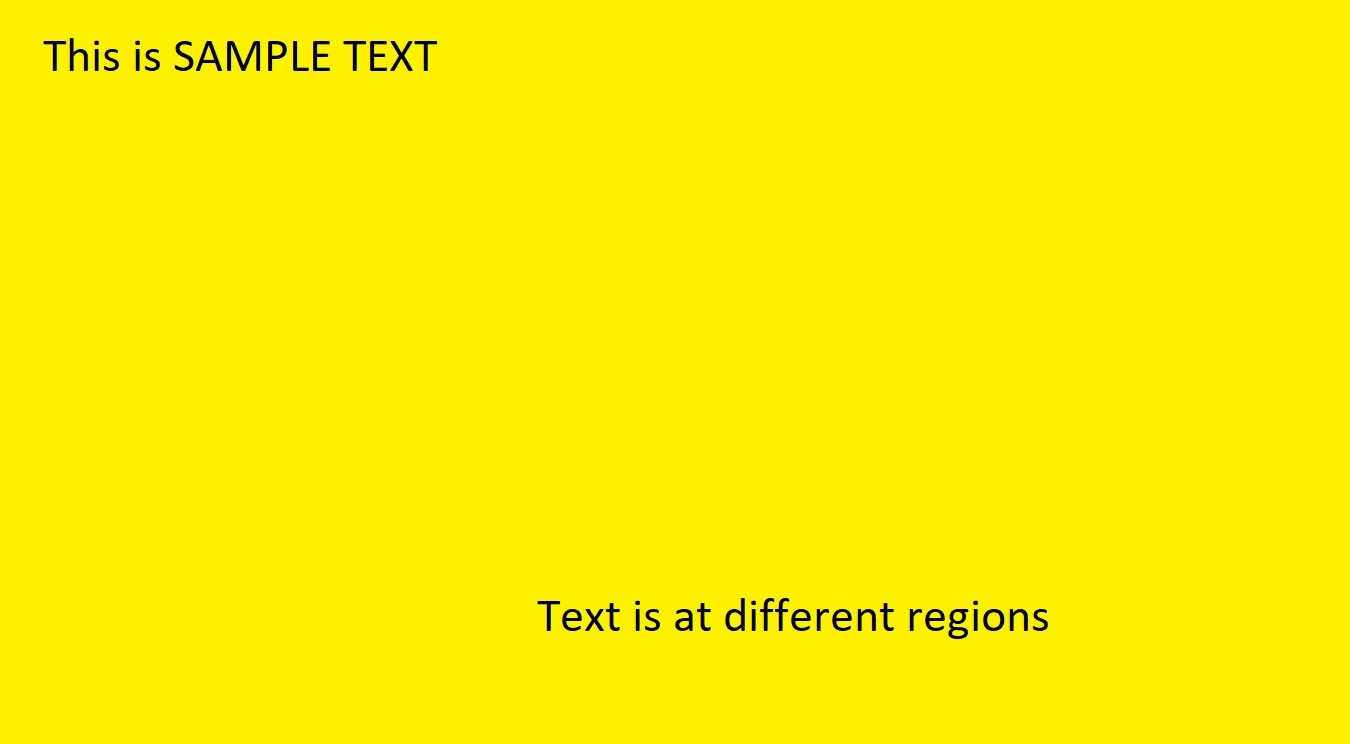

In [ ]:
img = cv2.imread(f"{dr}/OpenCV/sample4.jpg")
cv2_imshow(img)
#cv2.waitKey(0)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

In [ ]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

In [ ]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

In [ ]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

In [ ]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
im2 = img.copy() 

In [ ]:
file = open("recognized.txt", "w+") 
file.write("") 
file.close() 

In [ ]:
from PIL import Image
import pytesseract

In [ ]:
from google.colab import files
tt = files.upload()

Saving tesseract.exe to tesseract (1).exe


In [ ]:
pytesseract.pytesseract.tesseract_cmd = tt

In [ ]:
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    #print(rect)  
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
      
    # Open the file in append mode 
    file = open("recognized.txt", "a") 
    #storbinary("recognized.txt " + i, file)
      
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
    #text = 'K'
    #print(cropped)
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close 

TypeError: ignored

In [ ]:
import io
import cv2
from PIL import Image

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()
def detect_text(path):
    """Detects text in the file."""
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations
    string = ''

    for text in texts:
        string+=' ' + text.description
    return string

ImportError: ignored